# progHW 2: Least Square Approximation (Part 1)


### Important:
    * DO NOT import any packages unless explicitly asked.
    * ONLY work where "#. Your solution here..." is written. Nowhere else.
    * Do NOT change any function names, arguments, etc.
    * Please follow the hint instructions. If is stated to not return anything, please strictly do not. Else the AutoTest will break.

For this second laptop assignment, we are going to use least square approximation to predict the weights of penguins in Antartica, based on other anatomical information. We will be working with a dataset `palmerpenguins` (https://allisonhorst.github.io/palmerpenguins/index.html) which contains size measurements for three penguin species observed on three islands in the Palmer Archipelago in Antarctica. 


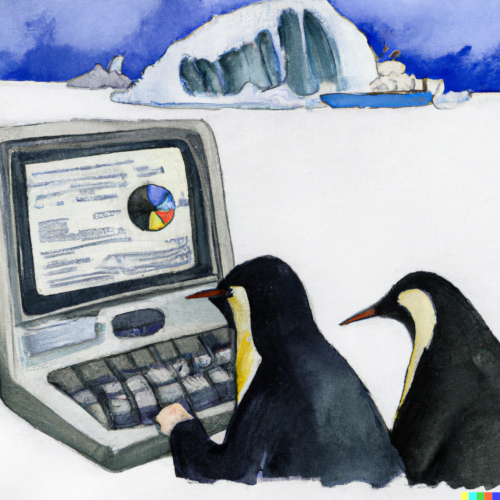


<center>Image generated with <a href=https://openai.com/dall-e-2/>DALL-E</a></center>

Our dataset is in the file `penguins.csv`. Make sure that `penguins.csv` is saved in the same folder as the notebook, otherwise you'll have problems when running the cell below.

We printed for you the first rows of the dataset, but it is good if you can also open the csv file with a text editor and check how the file looks like.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

path = os.path.abspath('./penguins.csv')

if not os.path.isfile(path):
    print(f'The csv file was not found. Please save it at {path}')

else:
    penguins = pd.read_csv('penguins.csv', index_col=0)
    display(penguins.head())
    print(f'The shape of our dataset is {penguins.shape}')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


The shape of our dataset is (333, 8)


`penguins` is a table where each row contains different information about one penguin. For example, the specie of the first penguin is Adelie, its island is Orgersen, the length of its bill is $39.1$, etc. Here we only printed the information about the first five penguins, but in total, as we can see from the shape, we have a dataset of $333$ penguins, for each of which we have $8$ features (note that the first column contains only the number of the row and so we do not count it as an actual feature).

## A first model : predicting the weight using the flipper length

As mentioned earlier, our goal is to use least square approximation to build a model that can predict the weight of a penguin based on other anatomical information about that penguin. For example, knowing the sex and the flipper length of a penguin, what would be our best prediction for its weight? Using machine learning terminology, the sex and the flipper length are the input variables and the weight is the target or the output variable. To make things easier, we will first start with a model with only one one input variable, e.g. the flipper length. 

This means that we are interested in finding a relationship between the flipper length and the weight of the penguins. Let us start by making a numpy array containing our input data and target data. 

### Exercise 1 (0.25 pt): Create a data array

We ask you to create a numpy array `data` of shape $(333,2)$ such that each row $[x_i, y_i]$ contains the flipper length and weight of the penguin of the $i$-th row of our dataset. 

In general, in order a read a csv file, an easy option is using the [pandas library](https://pandas.pydata.org/). Pandas will produce a so-called pandas data frame, which can be easily converted into a numpy array, as you can see in this [example](https://numpy.org/doc/stable/user/absolute_beginners.html#importing-and-exporting-a-csv). This example should contain all the information you need to build your array `data`. We will not dive further into pandas here and we will use only numpy for the rest of the assignment.

Make sure that your numpy array `data` is correct by printing its shape (which should be $(333,2)$) and by printing for example its first five rows and comparing them to the table above. 

In [2]:
# Hint: Read your data to a variable named exactly 'data'.
data = pd.read_csv('penguins.csv', usecols=['flipper_length_mm', 'body_mass_g']).values

### Exercise 2 (0.25 pt): Visualize the data

We now ask you to provide a visualization of the relationship between the flipper length and the weight.
So you should plot all the points $(x_i, y_i)$ where $x_i$ is the flipper length of the $i$-th penguin and $y_i$ is the weight of the $i$-th penguin. 

Hint: Recall what we did in the exercise "Plotting a dataset" from the previous notebook. Remember to use a marker such as `'.'` to make sure that you are plotting individual points and not a line. Make sure to also label the axes using `plt.xlabel` and `plt.ylabel`.

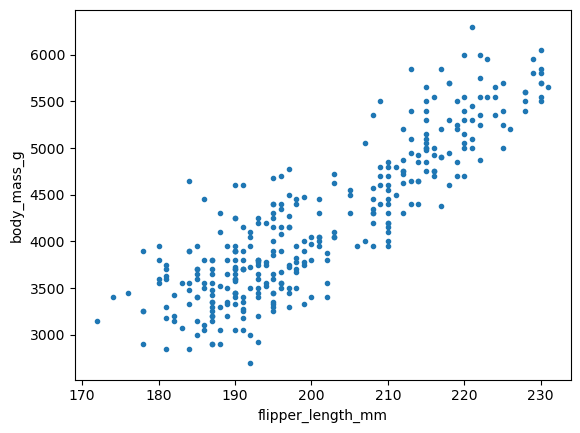

In [3]:
# Hint: Work using the given variables dataset_fig and dataset_ax. Do NOT change these names.
dataset_fig, dataset_ax = plt.subplots()
# Hint: Use dataset_ax.plot()
data_x = data[:, 0]
data_y = data[:, 1]
plt.plot(data_x, data_y, '.')
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.show()

We are now going to use the least square method to compute the line fitting best our `data` set. In other words, we are going to compute the coefficients $a$ and $b$ such that the line
$$
a + bx
$$
minimizes the error for our dataset.

Recall that the coefficients $a$ and $b$ minimizing the error satisfy

$$
(X^T X) \begin{bmatrix} a \\ b \end{bmatrix} =  X^T \vec{y}
$$

where 

* $\vec{y}$ is a vector listing all the values of the target variable.

* $X$ is the feature matrix (this is the matrix that Poole calls $A$), corresponding to our model and input data.

### Exercise 3 (0.25 pt): Reshape target vector y

We ask you to define and print `y`. Make sure that `y` represent a vector column, i.e. the shape of `y` is of the form $(N,1)$, for some appropriate $N$. 

Hint. You may want to use the numpy function `reshape` to make sure that the shape of `y` is correct. 

In [4]:
# Hint: Store the target vector in variable 'y' (lowercase y). Do NOT deviate from this.

y = data_y.reshape(-1,1)

You can run the cell below to check your code.

In [5]:
# Test for y
N = data.shape[0]
assert np.shape(y) == (N,1), 'Incorrect shape for y'
assert y[0] == 3750, 'Basic test failed'
assert y[2] == 3250, 'Basic test failed'

print('Function seems to work')

Function seems to work


### Exercise 4 (0.25 pt): Define feature matrix X

We ask you to define and print $X$. Before starting defining $X$, decide what is the shape and what is the content of the feature matrix $X$, for our model $a + bx$ and our input data.

Hint. Check chapter $7.3$ in Poole if you are unsure how to define $X$. You may also want to have a look at the numpy functions `hstack` and `vstack` and the related exercises from the introductory notebook.

In [6]:
# Hint: Store the feature matrix in variable 'X' (uppercase X). Do NOT deviate from this.
data_x = data_x.reshape(-1,1)
ones = np.ones_like(data_x)
X = np.hstack((ones, data_x))


You can run the cell below to check your code.

In [7]:
# Test for X
N = data.shape[0]
assert X.shape == (N,2), 'The shape of X is incorrect'
assert X[0,0] == 1, 'Basic test failed'
assert X[56,0] == 1, 'Basic test failed'
assert X[0,1] == 181, 'Basic test failed'
assert X[N-1,1] == 198, 'Basic test failed'

print('Function seems to work')

Function seems to work


### Exercise 5 (0.25 pt): Compute coefficients a and b

Now that you have computed $X$ and $\vec{y}$, we can compute the coefficients $a$ and $b$ using the equation
$$
(X^T X) \begin{bmatrix} a \\ b \end{bmatrix} = X^T \vec{y}
$$
or equivalently, if the columns of $X$ are linearly independent,
$$
\begin{equation*}
\begin{bmatrix} a \\ b \end{bmatrix} = (X^T X)^{-1} X^T \vec{y}
\label{eq:X} \tag{1}
\end{equation*}
$$
 
We ask you now to compute $a$ and $b$, using the function [np.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html).

In [8]:
# Hint: Store the coefficients in variables 'a' and 'b' (lowercase). Do NOT deviate from this.
ab = np.linalg.inv(X.T @ X) @ X.T @ y
a = ab[0,0]
b = ab[1,0]


As you have seen in class, you can rewrite equation (1) using the pseudoinverse. Compute now $a$ and $b$ only using the pseudo-inverse (so you are not allowed to use the inverse and you can use only one matrix multiplication operation). If you did things correctly, your two computations (the one using the inverse, and the one using the pseudoinverse) should give you the same values for $a$ and $b$.

Hint. In numpy, you can use the function [np.linalg.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) to compute the pseudo-inverse of a matrix.


In [9]:
# Hint: Store the coefficients in variables 'a2' and 'b2' (lowercase). Do NOT deviate from this.
ab = np.linalg.pinv(X) @ y
a2 = ab[0,0]
b2 = ab[1,0]

### Exercise 6 (0.25 pt): Plot a + bx

Next, plot the line $a + bx$ (where $a$ and $b$ are the coefficients you just computed and that minimize the error). If your computation of $a$ and $b$ was correct, your line should look like this:

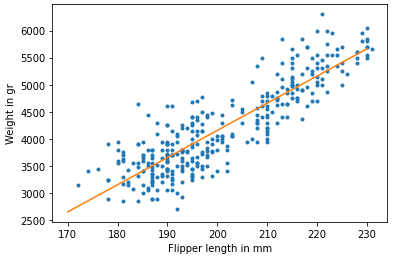

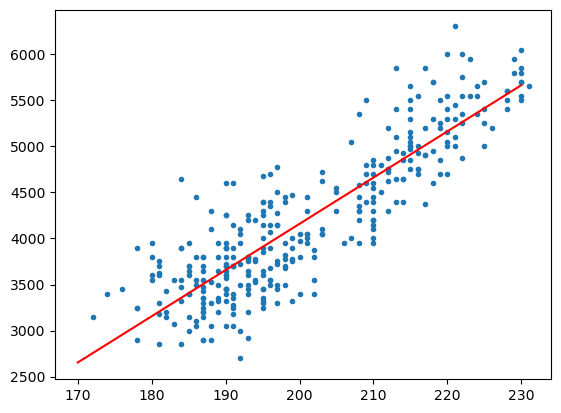

In [10]:
# We will provide you with x.
x_plot = np.linspace(170, 230, 200)


# Hint: Work using the given variables dataset_fig2 and dataset_ax2. Do NOT change these names.
dataset_fig2, dataset_ax2 = plt.subplots()

# Hint: Use dataset_ax2.plot() for both the original data and the line.
y_plot = a + b*x_plot
dataset_ax2.plot(data_x, data_y, '.')
dataset_ax2.plot(x_plot, y_plot, 'r')

### Exercise 7 (0.25 pt): Predict the weights

Using your model, predict now the weights for a penguin with flipper length $197$ mm and also for a penguin with flipper length $219$ mm.

In [11]:
# Hint: Store the predictions in variables 'p1' and 'p2' (lowercase). Do NOT deviate from this.
p1 = a + b*197
p2 = a + b*219

## Comparing two models

### Exercise 8 (0.25 pt): Compute coefficients for a different input variable

Instead of using the flipper length to predict the weight, we could have use any other feature such as bill depth, or the bill length. We ask you now to compute the linear regression model for a different input variable, namely the bill length. 

Your goal is to compute a linear model that would help predicting the weight of a penguin, given its bill length. So we ask you to find the coefficients $a'$ and $b'$ such that
$$
a' + b'x
$$
is the least square approximating line for our dataset, with input variable "bill_length_mm" and with target variable "body_mass_g".

Hint. With a few modifications, you should be able to reuse most of the previous code.

In [12]:
input_data_bill_length = pd.read_csv('penguins.csv', usecols=["bill_length_mm", "body_mass_g"]).values
#Hint: Store the coefficients in variables 'a3' and 'b3' (lowercase). Do NOT deviate from this.
data_x2 = input_data_bill_length[:, 0]
data_y2 = input_data_bill_length[:, 1]

data_x2 = data_x2.reshape(-1,1)
data_y2 = data_y2.reshape(-1,1)
ones2 = np.ones_like(data_x2)

X2 = np.hstack((ones2, data_x2))
ab3 = np.linalg.pinv(X2) @ data_y2
a3 = ab3[0, 0]
b3 = ab3[1, 0]


### Exercise 9 (0.25 pt): Plot a'+b'x

In order to visually check your model, we ask you to plot the line $a' + b'x$  (where $a'$  and $b'$  are the coefficients you just computed). Do you think this model is better than the previous one (i.e. the model with input variable "flipper_length_mm")? Verify this for yourself (no need to write it).

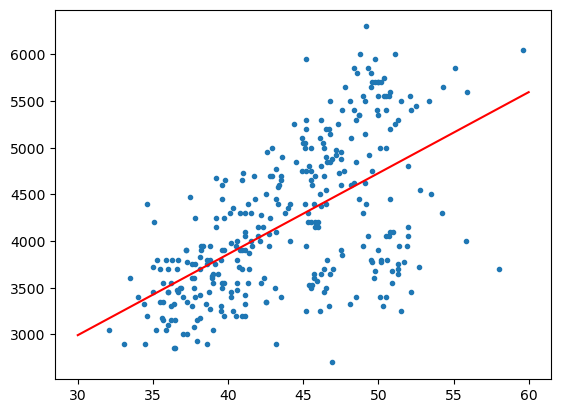

In [13]:
# We will provide you with a new x.
x_new = np.linspace(30, 60, 200)

# Hint: Work using the given variables dataset_fig3 and dataset_ax3. Do NOT change these names.
dataset_fig3, dataset_ax3 = plt.subplots()
# Hint: Use dataset_ax3.plot() for both the original data and the line.
y_new = a3 + b3*x_new
dataset_ax3.plot(data_x2, data_y2, '.')
dataset_ax3.plot(x_new, y_new, 'r')


We have now two different prediction models (one using the flipper length as input data and the second one using the bill length as input data) and we would like to be able to compare them.  

One way to go about this is to compute the *mean squared error* for each model and obviously, the best model should be the model with the smallest error. Recall that the mean squared error is defined as
$$
E(a, b) = \frac{1}{N} \sum_{i = 0}^{N-1} (a + b x_i  - y_i)^2 
$$
where $N$ is the total number of penguins, $x_i$ is the flipper lenght of the $i$-th penguin and $y_i$ is the weight of the $i$-th penguin.


### Exercise 10 (0.25 pt): Implement the mean squared error

We ask you to implement a function `error(a, b, input_data, target)` which given a linear model $a + bx$ with input data `input_data` and target data `target`, both of size $(N,)$, returns the mean squared error associated with that model.

In [14]:
# Hint: The function must return the mean squared error. Do NOT return anything else.

def error(a, b, input_data, target):
    N = input_data.shape[0]
    total = 0.0
    for i in range(N):
        x = input_data[i]
        y = target[i]
        total += (a + b*x - y)**2
    return total / N

You can run the cell below to test your function.

In [15]:
data_bill_depth = pd.read_csv('penguins.csv', usecols=["bill_depth_mm", "body_mass_g"]).values

assert np.isclose(error(-5000, 50, data_bill_depth[:,0], data_bill_depth[:,1]), 70433403.97897898), 'Basic test failed'
assert np.isclose(error(100, 500, data_bill_depth[:,0], data_bill_depth[:,1]), 22388179.42942943), 'Basic test failed'
assert np.isclose(error(10000, 5, data_bill_depth[:,0], data_bill_depth[:,1]), 35213888.746997), 'Basic test failed'

print('Function seems to work')

Function seems to work


### Exercise 11 (0.25 pt): Compute the mean squared error

Using the `error` function, compute the mean squared errors for our two different prediction models (i.e. the models that you computed in Exercise 5 and Exercise 8 and determine which model is better.

In [16]:
# Hint: Store the predictions in variables 'e1' and 'e2' (lowercase). Do NOT deviate from this.
e1 = error(a, b, data_x[:,0], y[:,0])
e2 = error(a3, b3, data_x2[:, 0], data_y2[:, 0])

One assumption of our linear regression model is that the relationship between our input data and our target data is linear, i.e. our model is of the form $y = a + bx$. If you run the cell below, you can see a visualisation of the relationship between the bill depth ($x$ axis) and the weight ($y$ axis). 

If we would use linear regression to predict the weight using the bill depth, do you think we would get good predictions? Would you think another model might be more suitable? Think about these questions for yourself (no need to write it down).

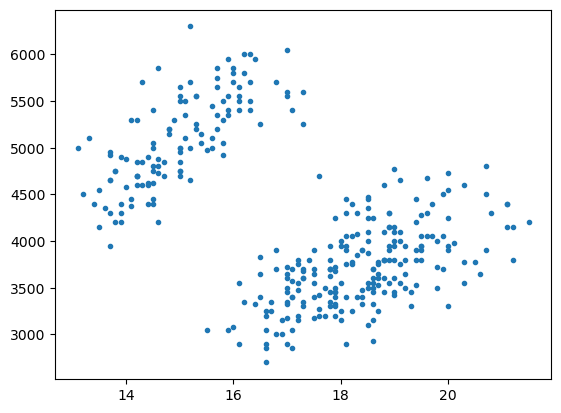

In [17]:
data_bill_depth = pd.read_csv('penguins.csv', usecols=["bill_depth_mm", "body_mass_g"]).values
plt.plot(data_bill_depth[:,0], data_bill_depth[:,1], '.')

plt.show()

## Moving to more than one input variable

We are now going to build a better predictive model by using more than one input variable. Namely, we are going to use the flipper length and the bill length to predict the weight of a penguin. Our linear model is now an equation of the form
$$
a'' + b''x_1 + c''x_2 
$$
where $x_1$ is the first input variable (i.e. the flipper length) and $x_2$ is your second input variable (i.e the bill length). The target variable is still the weight. 

In order to compute $a'', b''$ and $c''$, you can still use the equation
$$
((X'')^T X'') \begin{bmatrix} a'' \\ b'' \\ c''\end{bmatrix} =  (X'')^T \vec{y}
$$
where $\vec{y}$ is defined as before, but $X''$ is the new feature matrix, corresponding to our new model $
a'' + b''x_1 + c''x_2 
$ and our input data (consisting of the the flipper lengths and the bill lengths).

### Exercise 12 (0.25 pt): Using multiple input variables

Decide what is the content of $X''$ for this new model, and compute $a'',b''$ and $c''$. Define `coeff` as the list $[a'', b'', c'']$.

In [28]:
#Hint: Store the coefficients in variables 'a4', 'b4', and 'c4' (lowercase). Do NOT deviate from this.
all_data = pd.read_csv('penguins.csv', usecols=["bill_length_mm", "flipper_length_mm", "body_mass_g"]).values
data_bill = all_data[:,0]
data_bill = data_bill.reshape(-1, 1)

data_flip = all_data[:,1]
data_flip = data_flip.reshape(-1, 1)

data_mass = all_data[:,2]
data_mass = data_mass.reshape(-1, 1)
ones3 = np.ones_like(data_bill)

X_pp = np.hstack((ones3, data_flip, data_bill))

ab4 = np.linalg.pinv(X_pp) @ data_mass
a4 = ab4[0, 0]
b4 = ab4[1, 0]
c4 = ab4[2, 0]




### Exercise 13 (0.25 pt): Compute the mean squared error using multiple input variables

In order to compare this model with our previous best model (i.e. the model with one input variable "flipper_length_mm"), we ask you to compute the mean squared error of our new model with two input variables. In the case where we have two input variables, the mean squared error is defined by
$$
\frac{1}{N} \sum_{i = 0}^{N-1} (a'' + b''\;x_1[i] + c'' \; x_2[i]  - y[i])^2 
$$
where $x_1[i]$ is the flipper length of the $i$-th penguin, $x_2[i]$ is the bill length of the $i$-th penguin and $y[i]$ is the weight of the $i$-th penguin.

How does the model with two input variables compare to the model with one input variable "flipper_length_mm"?

In [29]:
#Hint: Store the mean squared error in variable 'mse' (lowercase). Do NOT deviate from this.
def error_2(a, b, c, input_data_1, input_data_2, target):
    N = input_data_1.shape[0]
    total = 0.0
    for i in range(N):
        x_1 = input_data_1[i]
        x_2 = input_data_2[i]
        y = target[i]
        total += (a + b*x_1 + c*x_2 - y)**2
    return total / N

mse = error_2(a4, b4, c4, data_bill[:, 0], data_flip[:,0], data_mass)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# creating a figure of size (16,12)
fig = plt.figure(figsize = (16,12))
# creating a 3D axis object ax 
ax = fig.add_subplot(projection='3d') 

x_data = data[:,0]
y_data = pd.read_csv('penguins.csv', usecols=["bill_length_mm"]).values[:,0]
z_data = data[:,1]
ax.scatter(x_data, y_data, z_data)

x_coord, y_coord = np.meshgrid(np.linspace(170,230,200), np.linspace(30,60,200))
z_coord = a4 + b4 * x_coord + c4* y_coord
ax.plot_surface(x_coord, y_coord, z_coord, alpha = 0.5)

# displaying the figure
plt.show() 